In [451]:
import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# 讀取資料 from 
train = pd.read_csv("C:/Users/User/Desktop/kaggle/Titanic/train.csv")
test  = pd.read_csv("C:/Users/User/Desktop//kaggle/Titanic//test.csv")
data = train.append(test)
data['Sex'] = data['Sex'].map ( { 'female':0 , 'male':1 } ).astype(int)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [452]:
data['Fare'] = data['Fare'].map(lambda x: np.log10(x) if x>0 else 0)
data['Fare 4'] = pd.qcut(data['Fare'],4).astype(str)
data['Fare 5'] = pd.qcut(data['Fare'],5).astype(str)
data['Fare 6'] = pd.qcut(data['Fare'],6).astype(str)
#train['Fare 4'] = train['Fare 4'].astype(str)#轉換區間為字符以便encoder

label = LabelEncoder()
data['Fare 4'] = label.fit_transform(data['Fare 4'] )
data['Fare 5'] = label.fit_transform(data['Fare 5'] )
data['Fare 6'] = label.fit_transform(data['Fare 6'] )

In [453]:
MrNumpre = data[ (data['Name'].str.contains('Mr.') == True) & (data['Name'].str.contains('Mrs') == False)]
MrMedian_age = MrNumpre['Age'].median()

data.Age[ (data['Name'].str.contains('Mr.') == True) & (data['Name'].str.contains('Mrs') == False)
          & (data.Age.isnull()) ] = MrMedian_age

#adding Mrs
MrsNumpre = data[data['Name'].str.contains('Mrs.') == True]
MrsMedian_age = MrsNumpre['Age'].median()
data.Age[ (data['Name'].str.contains('Mrs') == True ) & (data.Age.isnull()) ] = MrsMedian_age

#adding Miss.
MissNumpre = data[data['Name'].str.contains('Miss.') == True]
MissMedian_age = MissNumpre['Age'].median()
data.Age[ (data['Name'].str.contains('Miss') == True ) & (data.Age.isnull()) ] = MissMedian_age

#adding Master
MasterNumpre = data[data['Name'].str.contains('Master') == True]
MasterMedian_age = MasterNumpre['Age'].median()
data.Age[ (data['Name'].str.contains('Master') == True ) & (data.Age.isnull()) ] = MasterMedian_age

#adding Dr.
DrNumpre = data[data['Name'].str.contains('Dr.') == True]
DrMedian_age = DrNumpre['Age'].median()
data.Age[ (data['Name'].str.contains('Dr') == True ) & (data.Age.isnull()) ] = DrMedian_age

data.Age[data.Age.isnull()] = 25

data['Age3'] = data['Age'] 
data.Age3[data['Age'] < 14 ] = 1
data.Age3[ data['Age'].between(14,30)] = 2
data.Age3[data['Age'] > 30 ] = 2

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_la

In [350]:

ticketD = []                                                        #先製造新list
for ticket in data['Ticket'].unique():                              #將ticket種類頭跑到尾
    number = data.loc[data['Ticket'] == ticket]['Sex'].count()      #計算每種 ticket擁有的資料筆數
    if number>1:                                                    # 如果>1  表示兩人以上持有相同票號
        ticketD.append(data.loc[data['Ticket'] == ticket])          #將此種票號的資料加進list
ticketD = pd.concat(ticketD)                                        #將list轉成pandas格式
  
ticketD['connect'] = np.nan                                         #創新的connect column
ticketD['Survived1'] = ticketD['Survived']                          #創新的sur 用來計算           
#ticketD['Survived1'] = ticketD['Survived1'].fillna(0.5)             #將無生存數據的資料在新sur填上0.5 

for ti in ticketD['Ticket'].unique():                                  #ticketD 的票號從頭跑到尾
    if ticketD.loc[ticketD['Ticket'] == ti]['Survived1'].isnull().all():
        ticketD.connect[ticketD['Ticket'] == ti] = 0.5
    else:    
        mode = ticketD.loc[ticketD['Ticket'] == ti]['Survived1'].mode().mean() #將同樣票號的生存率取眾
        ticketD.connect[ticketD['Ticket'] == ti] = mode                     #將結果放進connect column

data['connect'] = 0.5   
for ti in ticketD['PassengerId']:                                   #ticketD是不同的資料型態
    data.connect[data['PassengerId']==ti] = ticketD.loc[ticketD['PassengerId']==ti]['connect'] 
                                                                    #將之融合回data 以pessengerID為對照
'''






ticketD = []                                                        #先製造新list
for ticket in data['Ticket'].unique():                              #將ticket種類頭跑到尾
    number = data.loc[data['Ticket'] == ticket]['Sex'].count()      #計算每種 ticket擁有的資料筆數
    if number>1:                                                    # 如果>1  表示兩人以上持有相同票號
        ticketD.append(data.loc[data['Ticket'] == ticket])          #將此種票號的資料加進list
ticketD = pd.concat(ticketD)                                        #將list轉成pandas格式
  
ticketD['connect'] = 0.5                                        #創新的connect column
ticketD['Survived1'] = ticketD['Survived']                          #創新的sur 用來計算           
#ticketD['Survived1'] = ticketD['Survived1'].fillna(0.5)             #將無生存數據的資料在新sur填上0.5 

for ti in ticketD['Ticket'].unique():                                  #ticketD 的票號從頭跑到尾
    if  ticketD.loc[ticketD['Ticket'] == ti]['Survived1'].max()==1:
        ticketD.connect[ticketD['Ticket'] == ti] = 1
    elif  ticketD.loc[ticketD['Ticket'] == ti]['Survived1'].min()==0:    
          ticketD.connect[ticketD['Ticket'] == ti] = 0      
        
data['connect'] = 0.5   
for ti in ticketD['PassengerId']:                                   #ticketD是不同的資料型態
    data.connect[data['PassengerId']==ti] = ticketD.loc[ticketD['PassengerId']==ti]['connect'] 
                                                              #將之融合回data 以pessengerID為對照

'''  

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


"\n\n\n\n\n\n\nticketD = []                                                        #先製造新list\nfor ticket in data['Ticket'].unique():                              #將ticket種類頭跑到尾\n    number = data.loc[data['Ticket'] == ticket]['Sex'].count()      #計算每種 ticket擁有的資料筆數\n    if number>1:                                                    # 如果>1  表示兩人以上持有相同票號\n        ticketD.append(data.loc[data['Ticket'] == ticket])          #將此種票號的資料加進list\nticketD = pd.concat(ticketD)                                        #將list轉成pandas格式\n  \nticketD['connect'] = 0.5                                        #創新的connect column\nticketD['Survived1'] = ticketD['Survived']                          #創新的sur 用來計算           \n#ticketD['Survived1'] = ticketD['Survived1'].fillna(0.5)             #將無生存數據的資料在新sur填上0.5 \n\nfor ti in ticketD['Ticket'].unique():                                  #ticketD 的票號從頭跑到尾\n    if  ticketD.loc[ticketD['Ticket'] == ti]['Survived1'].max()==1:\n        ticketD.connect[ticketD['Ticke

In [458]:
data['FamNum'] = data['SibSp'] + data['Parch']
data['Firstname'] = data['Name'].str.split(',').apply(lambda x:x[0])
#NameSurvivedrate = data.groupby('Firstname',as_index=False)[['Survived']].mean()
girl = data[(data['Sex']==0) & (data['Age3']<=1) & (data['FamNum']>=2)]
oldman = data[(data['Sex']==1) & (data['Age3']>=2 ) &(data['FamNum']>=2)]

manname = oldman.groupby('Firstname')[['Survived']].mean()
manname = manname[manname['Survived']==1].index


womanname = girl.groupby('Firstname')[['Survived']].mean()
womanname = womanname[womanname['Survived']==0].index



data.loc[(data['Survived'].isnull())&(data['Firstname'].isin(manname))&(data['Sex']==1),'Age3']=1
data.loc[(data['Survived'].isnull())&(data['Firstname'].isin(manname))&(data['Sex']==1),'Sex']=0

data.loc[(data['Survived'].isnull())&(data['Firstname'].isin(womanname))&(data['Sex']==1),'Age3']=2
data.loc[(data['Survived'].isnull())&(data['Firstname'].isin(womanname))&(data['Sex']==1),'Sex']=1

In [456]:
con=['Sex','Pclass','Fare 5','Age3']#,'connect']
test  = data[data['Survived'].isnull()]
train = data[data['Survived'].notnull()]

Y = train['Survived']
X = train.drop(['Survived','PassengerId'],axis=1)

Model = RandomForestClassifier(random_state=5,n_estimators=3050,min_samples_split=20,oob_score=True)
Model.fit(X[con],Y)
print(Model.oob_score_)



0.8181818181818182


In [457]:
X_submit = test.drop(['PassengerId'],axis=1)
Y_submit = Model.predict(X_submit[con])

submit = pd.DataFrame({   "PassengerId": test['PassengerId'],
                           "Survived"  : Y_submit.astype(int)})
submit.to_csv("submit con.csv",index=False)

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,Survived
connect,
0.0,0.000000
0.5,0.270270
1.0,0.794007


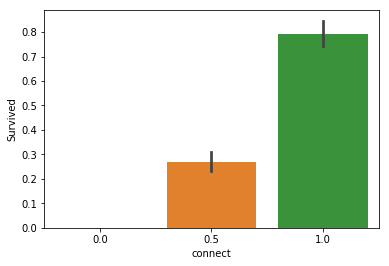

In [142]:
sns.barplot(x=data['connect'],y=data['Survived'])
data.groupby('connect')[['Survived']].mean()